In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from pathlib import Path

# Part 1: Prepare the Data

In [2]:
# Import the data from csv file
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Split data frame into Features (X) and Target or Response (Y)
df2 = df.drop("MYOPIC", axis=1)
df2

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
# Standarize the data with scaler and FIT to TRAINING SET
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

# Part 2: Apply Dimensionality Reduction

In [5]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=0.90)
pca_transformed = pca.fit_transform(df2_scaled)
pca_transformed_df = pd.DataFrame(data = df2_scaled)
pca_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [6]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed)

In [7]:
df2["X"] = transformed_features[:,0]
df2["y"] = transformed_features[:, 1]
df2["class"] = df["MYOPIC"]

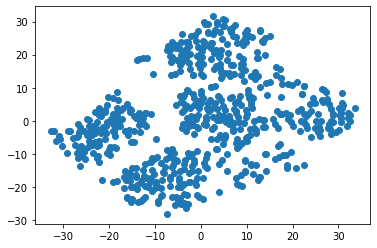

In [8]:
plt.scatter(df2["X"], df2["y"])
plt.show()

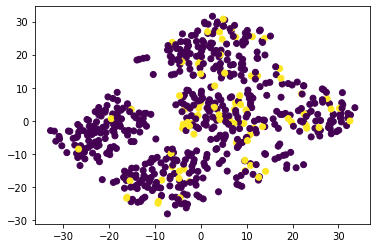

In [9]:
plt.scatter(df2["X"], df2["y"], c=df2["class"])
plt.show()


# Part 3: Perform a Cluster Analysis with K-means

In [10]:
inertia = []
k = list(range(1, 11))

# Inertia of Range of k-values
for i in k:
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(pca_transformed)
    inertia.append(km.inertia_)

# determine where the elbow of the plot is, and at which value of k it appears

In [11]:
inertia_plot = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(inertia_plot)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825


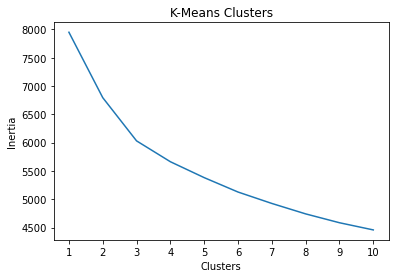

In [12]:
# Elbow Plot
plt.plot(df_elbow["k"], inertia_plot["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Clusters")
plt.show()

The elbow of the K-Means Clusters plot is at 3 clusters

# Recommendation:

From the above visualizations, it appears that there are 3 distinct clusters of patients. These 3 groups of patients should be analysed separetly and the results compared. 